# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. I will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. I will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the data, I let my mind wander and ask as many questions as I found interesting about a bike-sharing services. Below is a number of interesting insights to explore: 
    1. What is bike-sharing services' main target market?
      1.1 Demographics, i.e. age, location, occupation, income, geographical location.
      1.2 Psychographic information, i.e. customers' values, interests, beliefs and hobbies.
      1.3 Identify marketing sources which bring or might bring customesrs to use the product.
      1.4 Identify the reason why customers might leave or dicontinue use.
    2. Are there any trends in popularity of the service?
      2.1 Daily/Weekly peak time(s).
      2.2 Seasonal peak time(s).
      2.3 Can these trends be affected by price rise/drop?
    3. Can we analyse the performance of each geo location and distribution?
      3.1 Identify locations which are being booked up very quickly/over performing.
      3.2 Identify locations which are underperforming or idling.
      3.3 Distribution trends, e.g. do bikes tend to gather in the city centre or at particular tourist locations?
      3.4 Trip durations and trip length.
    4. What is breakdown/ accidents/ theft rate?
      4.1 Dependancy on location, demographics, seasons, times of use.
    5. Can we cross-analyse any trends between the listed scopes?

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, I will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where the trip data can be freely downloaded:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

Each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. The data has been collected manuallyand is storred in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed. In addition, a random 2% sample of the original data is taken to make the exploration more manageable.

Note: The code below performs basic data manipulations using main python code, as an initial introduction to Python, other libraries such as Pandas or NumPy will be included at the later updates of this project.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, newline='') as f_in:
        ## Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = trip_reader.__next__()
        
        ## Use the pprint library to print the first trip
        ## see https//docs.python.org/3/library/pprint.html
    pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

I will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, I  will convert the Washington labels to match the other two.

In [4]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """ 
    
    if city =='NYC' or city == 'Chicago':
        duration = (int(datum['tripduration']))/60 # there are 60 seconds in each minute
    elif city == 'Washington':
        duration = (int(datum['Duration (ms)']))/60000 # there are 60000 miliseconds in one minute
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
#tests = {'NYC': 13.9833,
#         'Chicago': 15.4333,
#         'Washington': 7.1231}

#for city in tests:
#    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [5]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: Use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """    
    # extract and label data
    # Note: code format sugestion taken from Udacity slack forum
    if city =='NYC':
        dt_str = (datum['starttime'])
        # Convert String to Datetime and note appropriate format, should match the original data
        dt = datetime.strptime(dt_str, '%m/%d/%Y %H:%M:%S')
        # Convert back Datetime to Strings
        month = datetime.strftime (dt, '%m')
        hour = datetime.strftime(dt, '%H')
        day_of_week =datetime.strftime(dt, '%A')
    # Do the same operations for other two cities
    elif city == 'Chicago':
        dt_str = (datum['starttime'])
        dt = datetime.strptime(dt_str, '%m/%d/%Y %H:%M')
        month = datetime.strftime(dt, '%m')
        hour = datetime.strftime(dt, '%H')
        day_of_week = datetime.strftime(dt, '%A')
    elif city =='Washington':
        dt_str = (datum['Start date'])
        dt = datetime.strptime(dt_str, '%m/%d/%Y %H:%M')
        month = datetime.strftime(dt, '%m')
        hour = datetime.strftime(dt, '%H')
        day_of_week = datetime.strftime(dt, '%A')
    # Note: this function returns a tuple, with 3 values    
    return (month, hour, day_of_week, city)

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
#tests = {'NYC': (1, 0, 'Friday'),
#         'Chicago': (3, 23, 'Thursday'),
#         'Washington': (3, 22, 'Thursday')}

#for city in tests:
#    assert time_of_trip(example_trips[city], city) == tests[city]

In [6]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    # Upload the original data values to column user_type if cities are NYC and Chicago
    if city =='NYC'or city == 'Chicago':
        user_type = (datum['usertype'])
    # However, when you get to Washington replace its original values to 
    # correspond with the data in other two cities
    elif city == 'Washington':
        user_type = (datum['Member Type'])
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            user_type = 'Customer'   
    return user_type

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
#tests = {'NYC': 'Customer',
#         'Chicago': 'Subscriber',
#         'Washington': 'Subscriber'}

#for city in tests:
#    assert type_of_user(example_trips[city], city) == tests[city]

In [7]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    """    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## set up csv DictReader object to read and input file
        trip_reader = csv.DictReader(f_in)

        # collect data from `trip_reader` and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            ## get the cleaned data from the original data dictionaries.    ##
            ## The keys for the new_point dictionary should match           ##
            ## the column names set in the DictWriter object above.         ##
            
            new_point['duration'] = duration_in_mins(row, city)
            # Note: Populating each part of time_of_trip tuple into corresponding 
            # column. It is important to maintain the order as specified in
            # out_colnames because otherwise data will end up with wrong headings.
            # Note: format sugestion from Udacity slack forum
            new_point['month']= time_of_trip(row, city)[0]
            new_point['hour']= time_of_trip(row, city)[1]
            new_point['day_of_week']= time_of_trip(row, city)[2]
            
            new_point['user_type'] = type_of_user(row, city)          

            ## Write the processed information to the output file.           ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow (new_point)

In [8]:
# Test
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '03'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '03'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '01'),
             ('hour', '00'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we're ready to start exploring the data. In this section I will write some code to compute descriptive statistics from the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Findings**: 
- New York City has the highest number of 276,798 trips.
- NYC has a higher ratio of Subscribers to ordinary Customers where there are 8 Subscribers to 1 Customer, or 88%.
- Chicago has highest proportion of short-term customer trips of 17% out of total number of trips.

In [13]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
                
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        cus_short_trips = 0
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
                    
            # count all short term customers who ride for less that 30 minutes
            if row['user_type'] == 'Customer':
                if float(row['duration']) < 30.0:
                    cus_short_trips += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        # compute proportion of subscribers
        proportion_1 = (n_subscribers*100)//n_total
        # proportion of customers short rides of less that 30 minutes out of total number of trips
        proportion_2 = (cus_short_trips*100)//n_total 
        
        return(('\n Subscribers = {}, \n Customers = {}, \n Total = {}, \
                \n Proportion of subscribers = {}%, \
                \n Proportion of trips made by short-term customers = {}% \n')
               .format(n_subscribers, n_customers, n_total, proportion_1, proportion_2))

In [14]:
# Test
data_file_Washington = './data/Washington-2016-Summary.csv'
print('Washington: ' + number_of_trips(data_file_Washington))
data_file_NYC = './data/NYC-2016-Summary.csv'
print('NYC: '+ number_of_trips(data_file_NYC))
data_file_Chicago = './data/Chicago-2016-Summary.csv'
print('Chicago: ' + number_of_trips(data_file_Chicago))

Washington: 
 Subscribers = 51753, 
 Customers = 14573, 
 Total = 66326,                 
 Proportion of subscribers = 78%,                 
 Proportion of trips made by short-term customers = 13% 

NYC: 
 Subscribers = 245896, 
 Customers = 30902, 
 Total = 276798,                 
 Proportion of subscribers = 88%,                 
 Proportion of trips made by short-term customers = 8% 

Chicago: 
 Subscribers = 54982, 
 Customers = 17149, 
 Total = 72131,                 
 Proportion of subscribers = 76%,                 
 Proportion of trips made by short-term customers = 17% 



**Travel length Findings**: 
- The average trip length in Washington is 18.0 mins followed by Chicago at 16.0 mins, and NYC at 15.0 mins.
- In Washington the proportion of long-term riders is 10.8%, followed by Chicago at 8.3%, and NYC at 7.3%

In [15]:
#import csv
def trip_length(filename):
    """
    This function reads in a file with trip data and reports 
    the duration of trips.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # Define duration list
        duration = [] 
        long_rides = 0
        for row in reader:
            # Populate the list
            duration.append(float(row['duration']))
            # How many long term riders
            if float(row['duration']) >= 30.0:
                long_rides += 1
        # compute the average
        avg = sum(duration)//len(duration)
        # compute proportion of long rides        
        proportion = (long_rides*100)//len(duration)
                 
        return ('{} min(s) \n Long rides = {} %'.format(avg, proportion))

In [18]:
# Test
print('Trip durations per city \n')
data_file_Washington = './data/Washington-2016-Summary.csv'
print('Washington: ' + trip_length(data_file_Washington))
data_file_NYC = './data/NYC-2016-Summary.csv'
print('NYC: '+ trip_length(data_file_NYC))
data_file_Chicago = './data/Chicago-2016-Summary.csv'
print('Chicago: ' + trip_length(data_file_Chicago))

Trip durations per city 

Washington: 18.0 min(s) 
 Long rides = 10 %
NYC: 15.0 min(s) 
 Long rides = 7 %
Chicago: 16.0 min(s) 
 Long rides = 8 %


Lets dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Findings**: I chose New your city for following analysis as it has bigest number of ridership. 
In NYC Customers take longer trips on average of 32.0 min(s)

In [19]:
def NYC_analysis(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        # define lists for each type of customer Subscriber and Customer
        sub_duration = []   
        cus_duration = []
        for row in reader:
            # separate duration data in corresponding lists
            if row['user_type'] == 'Subscriber':
                sub_duration.append(float(row['duration']))
            elif row['user_type'] == 'Customer':
                cus_duration.append(float(row['duration']))
        # calculate average time each type of customer uses a bike    
        sub_avg_dur = sum(sub_duration) // len(sub_duration) 
        cus_avg_dur = sum(cus_duration) // len(cus_duration)
        return('\n Avg duration of Subscriber trips = {} min(s) \n Avg duration of Customer trips = {} min(s)' \
               .format(sub_avg_dur, cus_avg_dur))

data_file = './data/NYC-2016-Summary.csv'
print(NYC_analysis(data_file))


 Avg duration of Subscriber trips = 13.0 min(s) 
 Avg duration of Customer trips = 32.0 min(s)


<a id='visualizations'></a>
### Visualizations

The last set of values that I computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`.

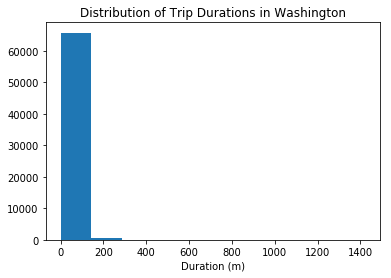

In [21]:
# load library
import matplotlib.pyplot as plt
import csv
# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# Washington Plot
with open('./data/Washington-2016-Summary.csv', 'r') as f_in:
    # set up csv reader object
    reader = csv.DictReader(f_in)
    # Define data list
    data = []  
    # populate list with values
    for row in reader:
        # Define duration list
        data.append(float(row['duration']))

plt.hist(data)
plt.title('Distribution of Trip Durations in Washington')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

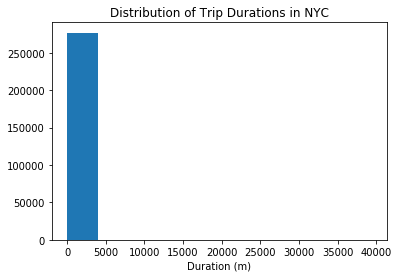

In [22]:
# Chicago Plot
with open('./data/NYC-2016-Summary.csv', 'r') as f_in:
    # set up csv reader object
    reader = csv.DictReader(f_in)
    # Define data list
    data = []  
    # populate list with values
    for row in reader:
        # Define duration list
        data.append(float(row['duration']))

plt.hist(data)
plt.title('Distribution of Trip Durations in NYC')
plt.xlabel('Duration (m)')
plt.show()

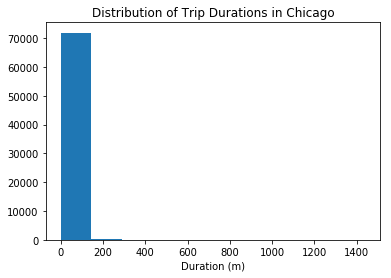

In [23]:
# New York City Plot
with open('./data/Chicago-2016-Summary.csv', 'r') as f_in:
    # set up csv reader object
    reader = csv.DictReader(f_in)
    #Define data list
    data = []  
    #populate list with values
    for row in reader:
        # Define duration list
        data.append(float(row['duration']))

plt.hist(data)
plt.title('Distribution of Trip Durations in Chicago')
plt.xlabel('Duration (m)')
plt.show()

The plots above are quite unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Tha data is very highly skewed to the right. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, I  will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

I will use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in selected city. I will do the same thing for only the Customers. also limits will be added to the plots so that only trips of duration less than 75 minutes are plotted. The plots' bars are in five-minute wide intervals.

**Findings**: 
- Plot 1 illustrates a histogram with distribution of number of trips for Subscribers. This plot is skewed to the right and peaks dramaticaly at 5-10 minutes duration, sugesting that vast majority of Subscribers use bikes for short trips of 5-10 minutes.
- Plot 2 shows distribution of trips made by Customers. As plot 1 it also has a positive skew and symmetricaly distributed, however not as dramaticaly as in Plot 1. The histogram peaks more to the middle of distribution showing that Customers mostly use bikes for longer trips of 20-25 minutes.

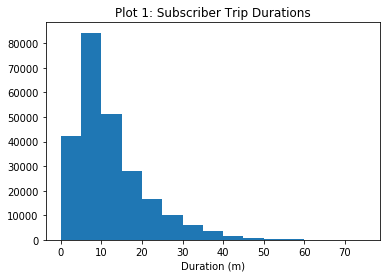

In [24]:
# New York City Plot
%matplotlib inline
with open('./data/NYC-2016-Summary.csv', 'r') as f_in:
    # set up csv reader object
    reader = csv.DictReader(f_in)
    #Define data list
    data_1 = []
    #populate list with values
    for row in reader:
        # Define duration list
        if row['user_type'] == 'Subscriber': 
            data_1.append(float(row['duration']))

plt.hist(data_1, 15, (0, 75.0))
plt.title('Plot 1: Subscriber Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

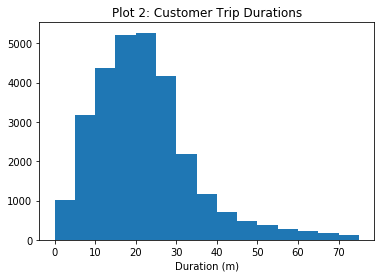

In [25]:
## Use this and additional cells to answer Question 5. ##
# New York City Plot
%matplotlib inline
with open('./data/NYC-2016-Summary.csv', 'r') as f_in:
    # set up csv reader object
    reader = csv.DictReader(f_in)
    #Define data list
    data = []  
    #populate list with values
    for row in reader:
        # Define duration list
        if row['user_type'] == 'Customer': 
            data.append(float(row['duration']))

plt.hist(data, 15, (0, 75.0))
plt.title('Plot 2: Customer Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

Here are some further questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

**Peak Seasons.**
It can be observed that there is a gradual increase in usig the service from cold months to warm months of the year.  
Third quarter of the year (which is summer) is the most popular with total number of 28,796 trips, of which Customers - 8,434, Subscribers - 20,362.  
In contrast winter season is the lowest with total of 8014 trips, of which Customers - 855, Subscribers - 7,159.

**Peak Months.**
Subscribers use the bake share services considerably more.  
The most popular month for subscribed users is June, peaking at 7,182 trips. Customers use bikes most in July (3,323 trips).   During winter one time customers use the services very rarely, 62 trips at most. Meanwhile subscribers are more commited even during cold season.

In [29]:
from pprint import pprint # use to print data structures like dictionaries in
def subscriber_peak_season(filename):
    """
    This function reads in a file with trip data and 
    returns a dictionery with number of subscriber rides per each month.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # Define lists
        subscribers = []
        month_counts = {}
        for row in reader:
            # Populate subscribers list with the months
            if row['user_type'] == 'Subscriber':
                subscribers.append(row['month'])
                # Sort the months in accending order using in-built function
                subscribers.sort()
                
        # Count occurrences of each of 12 months
        for month in subscribers:
            if month not in month_counts:
                month_counts[month] = 1 #add item as dictionery key, i.e. number of the month
            elif month in month_counts:
                month_counts[month] +=1 #add counter to value, i.e. n+1 
        #pprint(month_counts)
    return(month_counts)

In [30]:
def customer_peak_season(filename):
    """
    This function reads in a file with trip data and 
    returns a dictionery with number of customer rides per each month.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # Define lists
        customers = []
        month_counts = {}
        for row in reader:
            # Populate subscribers list with the months
            if row['user_type'] == 'Customer':
                customers.append(row['month'])
                # Sort the months in accending order using in-built function
                customers.sort()
                
        # Count occurrences of each of 12 months
        for month in customers:
            if month not in month_counts:
                month_counts[month] = 1 #add item as dictionery key, i.e. number of the month
            elif month in month_counts:
                month_counts[month] +=1 #add counter to value, i.e. n+1
        #pprint(month_counts)
    return(month_counts)

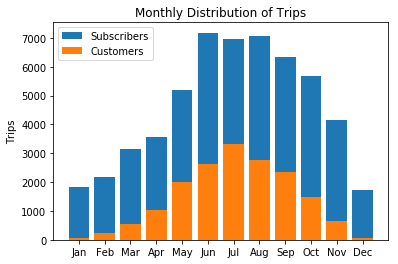

In [31]:
# Plot the data in a bar chart for Subscriber slice
data_file_Chicago = './data/Chicago-2016-Summary.csv'
data1 = subscriber_peak_season(data_file_Chicago)
data2 = customer_peak_season(data_file_Chicago)

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# Plot the data from specified file. Take number of entries for x axis (12 months). 
# Take the data values for y axis (month_count).
# Original code from:
# https://stackoverflow.com/questions/16010869/python-plot-a-bar-using-matplotlib-using-a-dictionary
data1 = plt.bar(range(len(data1)), list(data1.values()))
data2 = plt.bar(range(len(data2)), list(data2.values()))
plt.title('Monthly Distribution of Trips')
plt.ylabel('Trips')
plt.xticks(range(len(data1)), labels)
plt.legend((data1[0], data2[0]), ('Subscribers', 'Customers'))
plt.show()

In [36]:
def season_analysis(filename):
    """
    This function reads in a file with trip data and reports 
    the most popular season for the bike servise.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # Define Quarter lists
        Q1 = []
        Q2 = []
        Q3 = []
        Q4 = []
        for row in reader:
            if row['month'] >= '01' and row['month'] < '04':
                #Populate the list of quarter 1, January to March
                Q1.append(row['user_type'])
            elif row['month'] >= '04' and row['month'] < '07':
                #Populate the list of quarter 2, April to July
                Q2.append(row['user_type'])
            elif row['month'] >= '07' and row['month'] < '10':
                #Populate the list of quarter 3, July to October
                Q3.append(row['user_type'])
            elif row['month'] >= '10' and row['month'] <= '12':
                #Populate the list of quarter 1, January to March
                Q4.append(row['user_type'])
        # compute the total number of users each quarter
        Q1_users = len(Q1)
        Q2_users = len(Q2)
        Q3_users = len(Q3)
        Q4_users = len(Q4)
    return(Q1_users,Q2_users,Q3_users,Q4_users)

data_file_Chicago = './data/Chicago-2016-Summary.csv'
print(season_analysis(data_file_Chicago))

(8014, 21572, 28796, 13749)


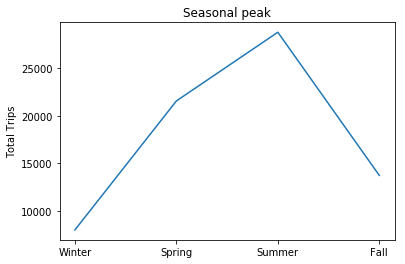

In [33]:
# Plot the line graph to illustrate the peaking season
data_file_Chicago = './data/Chicago-2016-Summary.csv'
data = season_analysis(data_file_Chicago)

labels = ['Winter','Spring','Summer','Fall']

plt.plot(data)
plt.title('Seasonal peak')
plt.ylabel('Total Trips')
plt.xticks(range(len(data)), labels)
plt.show()

<a id='conclusions'></a>
## Conclusions

Putting the bike share data aside, I find it very interesting to investigate real estate sales and rent data.
Analysis of sale price, illustrating the amounts at which the properties are being advertised vs. sold, will help when deciding how to price the property.
Analysing the purpose of sold property, (e.g. whether it has been purchased for living or for letting), will enable to find oportunity areas for real estate investors.

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0